In [121]:
import random
import pandas as pd
import tqdm

### OPS time

In [2096]:
num_agents = 1000

In [2097]:
tmp_data = []
for agent_id in tqdm.tqdm(range(num_agents//2)):
    tmp_data.append(
        {
            'agent_id': agent_id,
            'num_cases': int(np.random.normal(100, 30)),
            'passed_training': 1 if random.random() < 0.5 else 0,
            'tenure': int(np.random.exponential(6)),
            'treatment': 0,
            'cs_center': random.choices(['InnovativeSupport', 'FutureCS'], [0.7, 0.3])[0]
        }
    )
for agent_id in tqdm.tqdm(range(num_agents//2)):
    tmp_data.append(
        {
            'agent_id': num_agents//2 + agent_id,
            'num_cases': int(np.random.normal(100, 30)),
            'passed_training': 1 if random.random() < 0.5 else 0,
            'tenure': int(np.random.exponential(30)),
            'treatment': 1,
            'cs_center': random.choices(['SuperPros', 'ProfessionalAnswers'], [0.6, 0.4])[0]
        }
    )

agents_df = pd.DataFrame(tmp_data)

100%|████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 260839.80it/s]


In [2098]:
agents_df['average_mins_per_case'] = agents_df.tenure.map(
    lambda x: (np.random.normal(60*40, 3*60) - 10*x)/60
)

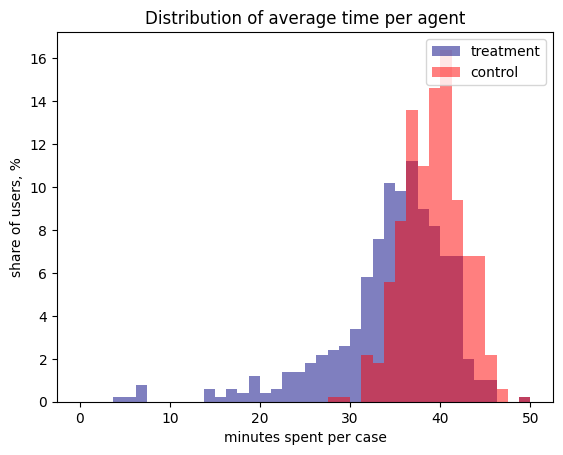

In [2099]:
hist_range = [0, 50]
hist_bins = 40

pyplot.hist(
    agents_df[agents_df.treatment == 1].average_mins_per_case.values,
    label = 'treatment',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'navy',
    # calculating weights to get normalised histogram
    weights = np.ones_like(agents_df[agents_df.treatment == 1].index)*100/agents_df[agents_df.treatment == 1].shape[0]
)

pyplot.hist(
    agents_df[agents_df.treatment == 0].average_mins_per_case.values,
    label = 'control',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'red',
    # calculating weights to get normalised histogram
    weights = np.ones_like(agents_df[agents_df.treatment == 0].index)*100/agents_df[agents_df.treatment == 0].shape[0]
)

pyplot.legend(loc = 'upper right')
pyplot.title('Distribution of average time per agent')
pyplot.xlabel('minutes spent per case')
pyplot.ylabel('share of users, %')
pyplot.show()

In [2100]:
agents_df = agents_df[agents_df.num_cases > 0]
agents_df = agents_df[agents_df.tenure > 0]
agents_df = agents_df[agents_df.average_mins_per_case > 10]
agents_df.shape[0]

905

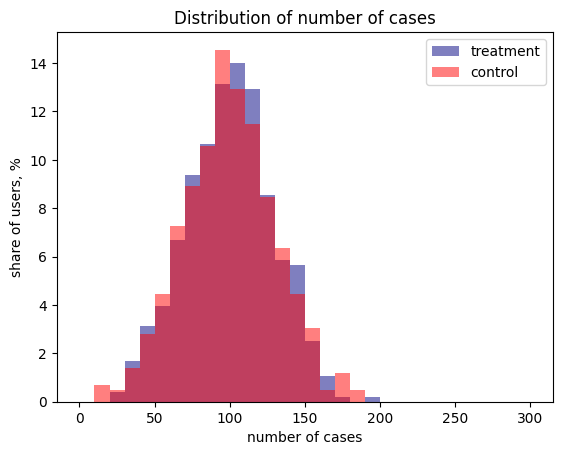

In [2101]:
hist_range = [0, 300]
hist_bins = 30

pyplot.hist(
    agents_df[agents_df.treatment == 1].num_cases.values,
    label = 'treatment',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'navy',
    # calculating weights to get normalised histogram
    weights = np.ones_like(agents_df[agents_df.treatment == 1].index)*100/agents_df[agents_df.treatment == 1].shape[0]
)

pyplot.hist(
    agents_df[agents_df.treatment == 0].num_cases.values,
    label = 'control',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'red',
    # calculating weights to get normalised histogram
    weights = np.ones_like(agents_df[agents_df.treatment == 0].index)*100/agents_df[agents_df.treatment == 0].shape[0]
)

pyplot.legend(loc = 'upper right')
pyplot.title('Distribution of number of cases')
pyplot.xlabel('number of cases')
pyplot.ylabel('share of users, %')
pyplot.show()

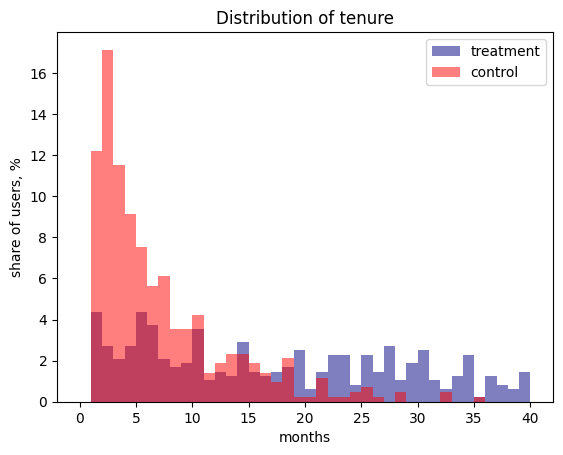

In [2102]:
hist_range = [0, 40]
hist_bins = 40

pyplot.hist(
    agents_df[agents_df.treatment == 1].tenure.values,
    label = 'treatment',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'navy',
    # calculating weights to get normalised histogram
    weights = np.ones_like(agents_df[agents_df.treatment == 1].index)*100/agents_df[agents_df.treatment == 1].shape[0]
)

pyplot.hist(
    agents_df[agents_df.treatment == 0].tenure.values,
    label = 'control',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'red',
    # calculating weights to get normalised histogram
    weights = np.ones_like(agents_df[agents_df.treatment == 0].index)*100/agents_df[agents_df.treatment == 0].shape[0]
)

pyplot.legend(loc = 'upper right')
pyplot.title('Distribution of tenure')
pyplot.xlabel('months')
pyplot.ylabel('share of users, %')
pyplot.show()

In [2103]:
tmp_data = []

for rec in tqdm.tqdm(agents_df.to_dict('records')):
    agent_id = rec['agent_id']
    treatment = rec['treatment'] 
    passed_training = rec['passed_training']
    average_mins = rec['average_mins_per_case']
    tenure = rec['tenure']
    complexity = random.choices(['low', 'medium', 'high'], [0.6, 0.3, 0.1])[0]

    if complexity == 'medium':
        average_mins = average_mins + np.random.normal(15, 0.5)
    elif complexity == 'high':
        average_mins = average_mins + np.random.normal(30, 1)
    
    if (treatment == 1) and (passed_training == 1):
        average_mins = average_mins - np.random.normal(3, 0.5)
        if average_mins < 3:
            average_mins = np.random.normal(3, 0.5) + 1

    for case_seq in range(rec['num_cases']):
        tmp_data.append(
            {
                'agent_id': agent_id,
                'treatment': treatment,
                'case_seq': case_seq,
                'passed_training': passed_training,
                'tenure': tenure,
                'time_spent_mins': np.random.normal(average_mins, 0.1*average_mins)/3,
                'complexity': complexity
            }
        )

100%|█████████████████████████████████████████████████████████████████| 905/905 [00:00<00:00, 15835.82it/s]


In [2117]:
df = pd.DataFrame(tmp_data)

In [2118]:
df['case_id'] = 1000*df.agent_id + df.case_seq

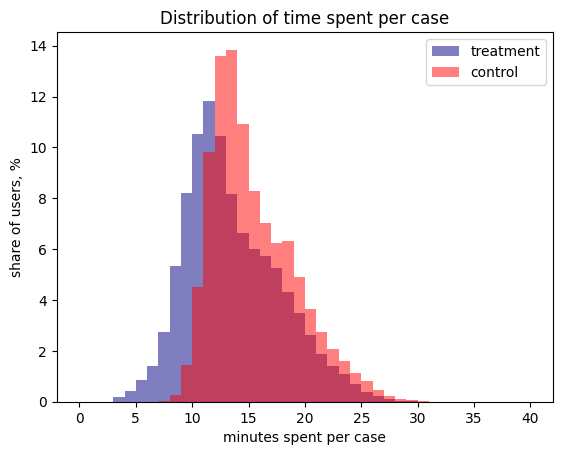

In [2119]:
hist_range = [0, 40]
hist_bins = 40

pyplot.hist(
    df[df.treatment == 1].time_spent_mins.values,
    label = 'treatment',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'navy',
    weights = np.ones_like(df[df.treatment == 1].index)*100/df[df.treatment == 1].shape[0]
)

pyplot.hist(
    df[df.treatment == 0].time_spent_mins.values,
    label = 'control',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'red',
    # calculating weights to get normalised histogram
    weights = np.ones_like(df[df.treatment == 0].index)*100/df[df.treatment == 0].shape[0]
)

pyplot.legend(loc = 'upper right')
pyplot.title('Distribution of time spent per case')
pyplot.xlabel('minutes spent per case')
pyplot.ylabel('share of users, %')
pyplot.show()

In [2120]:
df.groupby('treatment').aggregate(
    {'case_id': 'count', 'agent_id': 'nunique', 'time_spent_mins': 'mean'}
)

,case_id,agent_id,time_spent_mins
treatment,,,
0,42130,426,15.458559
1,47614,479,13.592172


In [2121]:
df['within_sla'] = df.time_spent_mins.map(lambda x: 1 if x <= 15 else 0)

In [2122]:
df['passed_training'] = list(map(
    lambda p, t: p if t == 1 else 0,
    df.passed_training,
    df.treatment
))

In [2123]:
df = df.merge(agents_df[['agent_id', 'cs_center']], on = 'agent_id')

In [2124]:
df = df[['case_id', 'agent_id', 'treatment', 'time_spent_mins', 'cs_center',
        'complexity', 'tenure', 'passed_training', 'within_sla']]

In [2125]:
df.to_csv('ops_experiment_synthetic_v2.csv', index = False)

In [2126]:
df.head()

,case_id,agent_id,treatment,time_spent_mins,cs_center,complexity,tenure,passed_training,within_sla
0,1000,1,0,19.199068,InnovativeSupport,medium,5,0,0
1,1001,1,0,15.144840,InnovativeSupport,medium,5,0,0
2,1002,1,0,16.383012,InnovativeSupport,medium,5,0,0
3,1003,1,0,17.814927,InnovativeSupport,medium,5,0,0
4,1004,1,0,14.470475,InnovativeSupport,medium,5,0,1
